# Example 4: Global sensitivity analysis using Message Passing Interface (MPI)

This notebook demonstrates how to perform global sensitivity analysis using distributed computing via Message Passing Interface (MPI) on the [asymmetric_division](https://github.com/MathCancer/PhysiCell/tree/master/sample_projects/asymmetric_division) PhysiCell model. MPI enables efficient scaling across multiple computing nodes or cores, making it ideal for high-performance computing environments and large-scale parameter studies.

The MPI-based approach offers several advantages:
1. **Distributed computing**: Simulations are distributed across multiple processes, potentially spanning multiple compute nodes
2. **Scalable parallelization**: Can utilize hundreds or thousands of cores simultaneously
3. **Memory efficiency**: Each MPI process manages its own memory space, avoiding memory bottlenecks
4. **Fault tolerance**: Failed processes don't necessarily crash the entire computation

The analysis employs Sobol sampling to generate parameter sets and examines stem cell division dynamics. The model includes a mathematical constraint where division probabilities must sum to 1, allowing for system reparameterization: probability of dividing into `progenitor_2` = 1 - probability of dividing into `progenitor_1`.

Parameters examined:
- **cycle_duration_stem_cell**: Duration of the stem cell cycle
- **asym_div_to_prog_1_sat**: Saturation of the probability that a stem cell divides into `progenitor_1` when in contact with `progenitor_1`
- **asym_div_to_prog_2_sat**: Saturation of the probability that a stem cell divides into `progenitor_2` when in contact with `progenitor_2`

The MPI implementation details are provided in [ex4_runSA_MPI.py](ex4_runSA_MPI.py), which handles process coordination and data aggregation.

## Create the Model Analysis Context, Generate Samples, and Run Simulations using MPI

In [1]:
%%bash
mpiexec -n 8 python ex4_runSA_MPI.py

Initializing MPI job with 8 processes...
Generated 48 samples using Sobol
Inserting parameter: cycle_duration_stem_cell with properties: {'lower_bound': 1152.0, 'upper_bound': 1728.0, 'ref_value': 1440.0, 'perturbation': None}
Inserting parameter: asym_div_to_prog_1_sat with properties: {'lower_bound': 0.0, 'upper_bound': 1.0, 'ref_value': 0.0, 'perturbation': None}
Inserting {} QoIs into the database
Simulations completed and results stored in the database: ex4_PhysiCell_SA_MPI.db.


## Load the results

In [2]:
# Load results from the database
from uq_physicell.database.ma_db import load_structure
from uq_physicell.model_analysis.utils import calculate_qoi_statistics
import pandas as pd

# Load the results
db_path = "ex4_PhysiCell_SA_MPI.db"
df_metadata, df_parameter_space, df_qois, dic_input, df_output = load_structure(db_path)
print("Calculate summary stats accros replicates...")
qoi_funcs = {'frac_proj1_cells':None, 'frac_proj2_cells':None, 'run_time_sec':None}
df_summary_qois, df_relative_mcse = calculate_qoi_statistics(df_output, qoi_funcs=qoi_funcs, db_file_path=db_path)
display(df_summary_qois)

Calculate summary stats accros replicates...
Calculating QoIs from DataFrame...
Number of replicates: 5


,frac_proj1_cells_0,frac_proj2_cells_0,run_time_sec_0,time_0
SampleID,,,,
0,0.877083,0.092045,11.170466,2880.01
1,0.872570,0.097230,11.283410,2880.01
2,0.662221,0.307074,10.883856,2880.01
3,0.632985,0.335942,10.688699,2880.01
4,0.876894,0.092424,10.489313,2880.01
5,0.654545,0.315152,10.806461,2880.01
6,0.713691,0.255236,11.059004,2880.01
7,0.643015,0.326671,11.034336,2880.01
8,0.781212,0.188452,11.355695,2880.01


### Plot the summary stats and Monte Carlo Standart Error (MCSE)

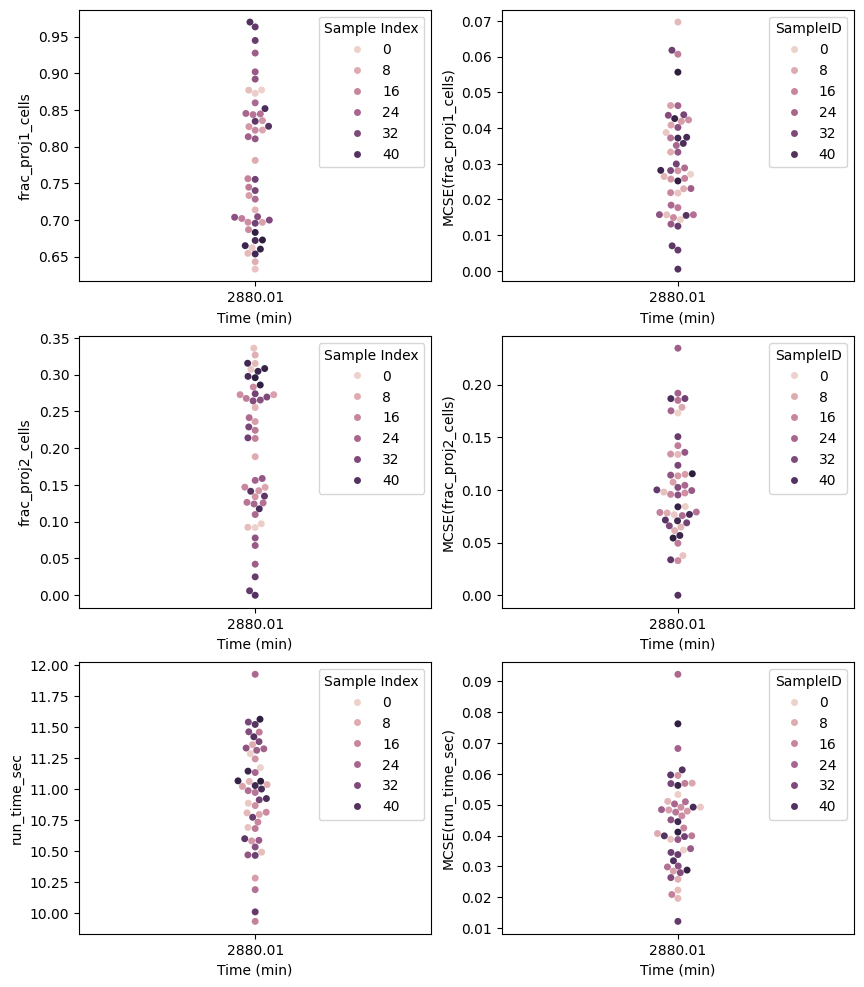

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(qoi_funcs.keys()), 2, figsize=(10, 4*len(qoi_funcs.keys())))
time_columns = sorted([col for col in df_summary_qois.columns if col.startswith("time_")])
for ax_id, qoi_name in enumerate(qoi_funcs.keys()):
    qoi_columns = sorted([col for col in df_summary_qois.columns if col.startswith(qoi_name)])
    # Prepare the data for seaborn
    plot_data_summary = pd.DataFrame({"Time": df_summary_qois[time_columns].values.flatten(), qoi_name: df_summary_qois[qoi_columns].values.flatten(), "SampleID": df_summary_qois.index.repeat(len(qoi_columns))})
    plot_data_mcse = pd.DataFrame({"Time": df_relative_mcse[time_columns].values.flatten(), qoi_name: df_relative_mcse[qoi_columns].values.flatten(), "SampleID": df_relative_mcse.index.repeat(len(qoi_columns))})
    # Plot summary stats
    sns.swarmplot(data=plot_data_summary, x="Time", y=qoi_name, hue="SampleID", ax=axes[ax_id,0])
    axes[ax_id,0].set_xlabel("Time (min)")
    axes[ax_id,0].set_ylabel(qoi_name)
    # Only add legend if there are labeled artists
    handles, labels = axes[ax_id,0].get_legend_handles_labels()
    if handles and labels:
        axes[ax_id,0].legend(title="Sample Index")
    # Plot mcse
    sns.swarmplot(data=plot_data_mcse, x="Time", y=qoi_name, hue="SampleID", ax=axes[ax_id,1])
    axes[ax_id,1].set_xlabel("Time (min)")
    axes[ax_id,1].set_ylabel(f"MCSE({qoi_name})")

## Run the Sobol Sensitivity Analysis

In [4]:
from uq_physicell.model_analysis import run_global_sa
sa_method = "Sobol Sensitivity Analysis"
all_qois_names = list(qoi_funcs.keys())
all_times_label = [col for col in df_summary_qois.columns if col.startswith("time")]
params_info = {
            "cycle_duration_stem_cell": {"lower_bound": 1152.0, "upper_bound": 1728.0, "ref_value":1440.0 },
            "asym_div_to_prog_1_sat": {"lower_bound": 0.0, "upper_bound": 1.0, "ref_value": 0.0}
        }
params_info["samples"] = dic_input
sa_results, qoi_time_values = run_global_sa(params_info, sa_method, all_times_label, all_qois_names, df_summary_qois)

Running Sobol Sensitivity Analysis for QoI: frac_proj1_cells and time: 2880.01
Running Sobol Sensitivity Analysis for QoI: frac_proj2_cells and time: 2880.01
Running Sobol Sensitivity Analysis for QoI: run_time_sec and time: 2880.01


/Users/heberlr/.pyenv/versions/pcvenv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


### Plot SA results

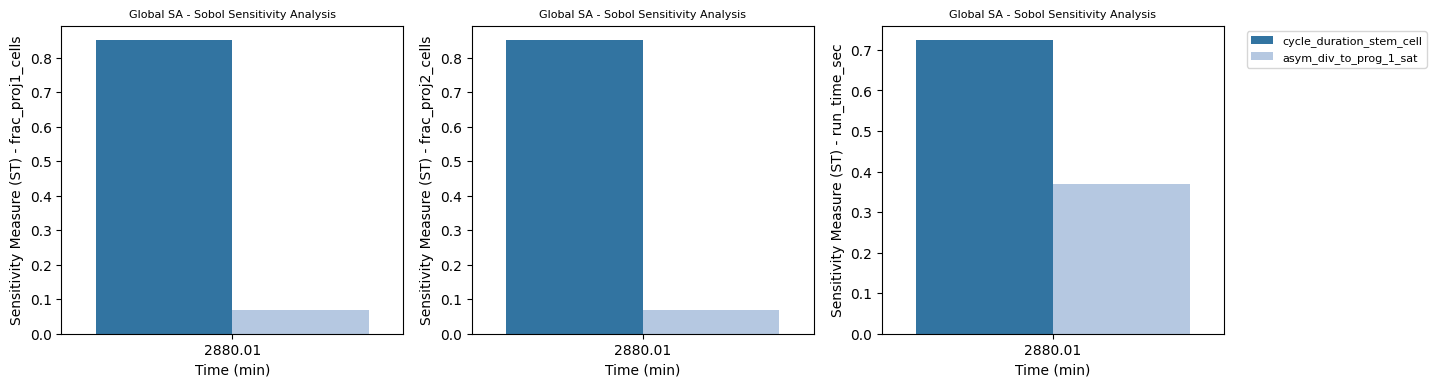

In [5]:
fig, axes = plt.subplots(1, len(qoi_funcs.keys()), figsize=(5*len(qoi_funcs.keys()), 4))
param_names = [key for key in params_info if key != "samples"]
SI = "ST"
for ax_id, qoi_name in enumerate(qoi_funcs.keys()):
    # This is necessary because Sobol method does not return the names of the parameters
    plot_data = pd.DataFrame([{ "Time": qoi_time_values[time_label], "Sensitivity Index": sa_results[qoi_name][time_label][SI][param_id],
            "Parameter": param}
        for time_label in sa_results[qoi_name].keys()
        for param_id, param in enumerate(param_names)
    ])
    # Sort Parameters by the maximum Sensitivity Index in descending order
    parameter_order = (
        plot_data.groupby("Parameter")["Sensitivity Index"]
        .max()
        .sort_values(ascending=False)
        .index
    )
    custom_palette = sns.color_palette("tab20", len(plot_data["Parameter"].unique()))
    sns.barplot(data=plot_data, x="Time", y="Sensitivity Index", hue="Parameter", ax=axes[ax_id], palette=custom_palette, hue_order=parameter_order)                
    axes[ax_id].set_xlabel("Time (min)")
    axes[ax_id].set_ylabel(f"Sensitivity Measure ({SI}) - {qoi_name}")
    axes[ax_id].set_title(f"Global SA - {sa_method}", fontsize=8)
    # Only add legend if it is the last qoi
    if qoi_name == list(qoi_funcs.keys())[-1]:
        handles, labels = axes[ax_id].get_legend_handles_labels()
        if handles and labels:
            axes[ax_id].legend(bbox_to_anchor=(1.05, 1), loc="upper left", title_fontsize=8, fontsize=8)
    else:
        axes[ax_id].get_legend().remove()